# XGBoost model
Boosting is an ensemble learning technique that combines multiple weak learners to create a strong learner. It works by training a series of models sequentially, where each model tries to correct the errors made by the previous model. The final output is a weighted sum of the predictions from all the models. Boosting can be used with various types of base learners, but decision trees are commonly used due to their flexibility and interpretability.
XGBoost (Extreme Gradient Boosting) is an optimized implementation of the gradient boosting algorithm that is designed to be highly efficient and scalable. It includes several advanced features such as regularization, parallel processing, and tree pruning, which help to improve the performance and reduce overfitting. XGBoost has become one of the most popular machine learning algorithms due to its speed and accuracy, especially in Kaggle competitions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier, plot_tree
import joblib


## Loading the data

In [2]:
data_path = 'cleaned_titanic_dataset.csv'

# Load the dataset
df = pd.read_csv(data_path)
df.reset_index(drop=True, inplace=True)

In [3]:
# Get feature and target variables
y = df['survived']
X = df.drop('survived', axis=1)

In [4]:
# Get categorical and numerical columns
categorical_cols = ['pclass', 'sex', 'embarked']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

In [5]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='drop'
)

In [6]:
# Create a pipeline with preprocessing and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', max_depth=3))
])

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train the model
model = pipeline.fit(X_train, y_train)

Accuracy: 0.8161764705882353
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.81      0.75      0.78        59

    accuracy                           0.82       136
   macro avg       0.82      0.81      0.81       136
weighted avg       0.82      0.82      0.81       136



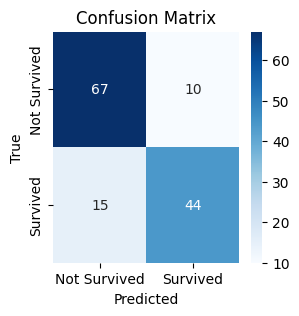

In [9]:
# Plot metrics
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

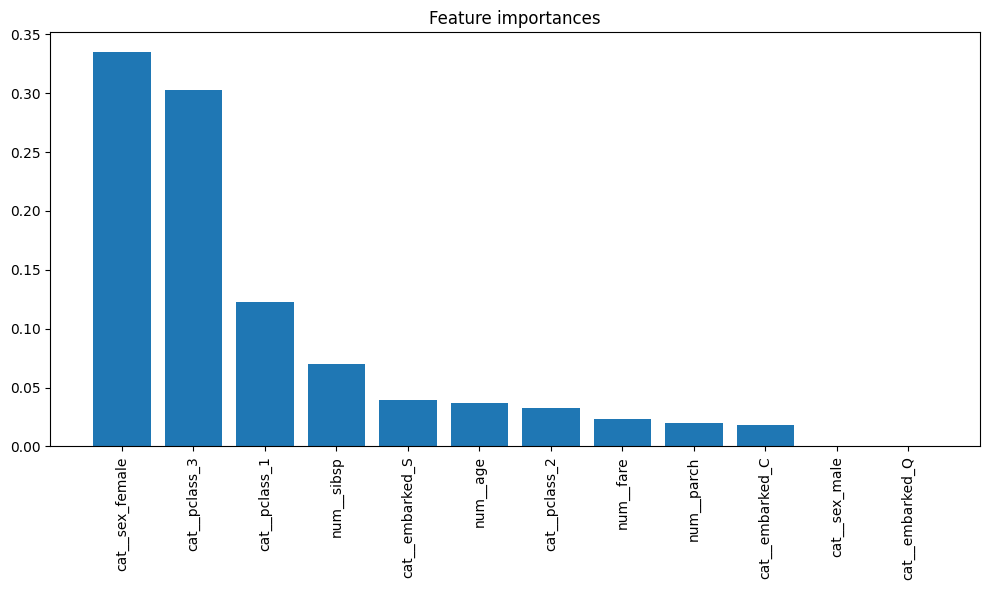

In [10]:
importances = model.named_steps['classifier'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

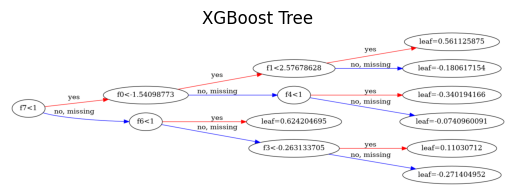

In [11]:
plot_tree(model.named_steps['classifier'], tree_idx=0, rankdir='LR')
plt.title('XGBoost Tree')
plt.show()

In [12]:
# Save the model
joblib.dump(model, 'titanic_model_XGB.pkl')
# Load the model
loaded_model = joblib.load('titanic_model_XGB.pkl')